In [41]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [42]:
X_train = pd.read_csv("/home/ajaykumar/ML/CNN/input.csv")
Y_train = pd.read_csv("/home/ajaykumar/ML/CNN/labels.csv")

X_test = pd.read_csv("/home/ajaykumar/ML/CNN/input_test.csv")
Y_test = pd.read_csv("/home/ajaykumar/ML/CNN/labels_test.csv")

X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [43]:
X_train =   X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

X_train = X_train/255.0
X_test = X_test/255.0

(1999, 100, 100, 3)
(1999, 1)
(399, 100, 100, 3)
(399, 1)


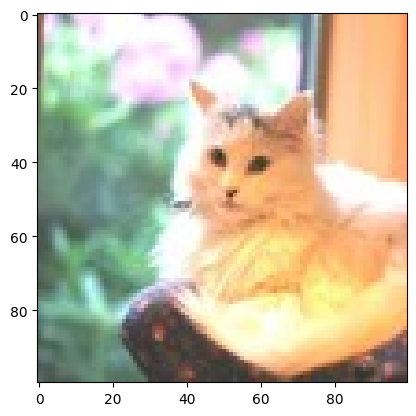

In [44]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx, :])
plt.show()
# print(X_train[0,:])

In [46]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu',input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1,activation='sigmoid')
])

In [48]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

In [51]:
model.fit(X_train,Y_train,epochs = 5, batch_size =64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.8577 - loss: 0.3228
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.8735 - loss: 0.3063
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9302 - loss: 0.2064
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9575 - loss: 0.1584
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9669 - loss: 0.1292


In [52]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6998 - loss: 0.7090


[0.7581250667572021, 0.6842105388641357]

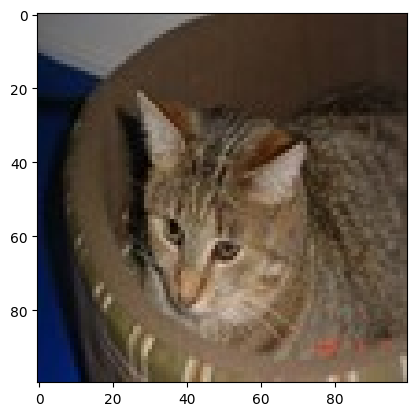

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
it is dog


In [56]:
idx = random.randint(0,len(Y_test))
plt.imshow(X_test[idx,:])
plt.show()

y_pred = model.predict(X_test[idx,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5
if y_pred == 0:
    print("it is dog")
else:
    print("it is cat")